<a href="https://colab.research.google.com/github/anirudhkowluri/knn-classifier/blob/main/knn_classifier_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix

In [2]:
df = pd.read_csv("/content/diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
Pedigree,0
Age,0
Outcome,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
#Replace all the 0 values from pregnancies to insulin columns with thier mean values#
for column in df.columns[1:-3]:
    df[column].replace(0,np.nan, inplace=True)
    df[column].fillna(round(df[column].mean(skipna=True)), inplace=True)
df.head(10)

<ipython-input-10-a115214c52a5>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].replace(0,np.nan, inplace=True)
<ipython-input-10-a115214c52a5>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148.0,72.0,35.0,156.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,156.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,156.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,29.0,156.0,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,72.0,29.0,156.0,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,29.0,156.0,32.0,0.232,54,1


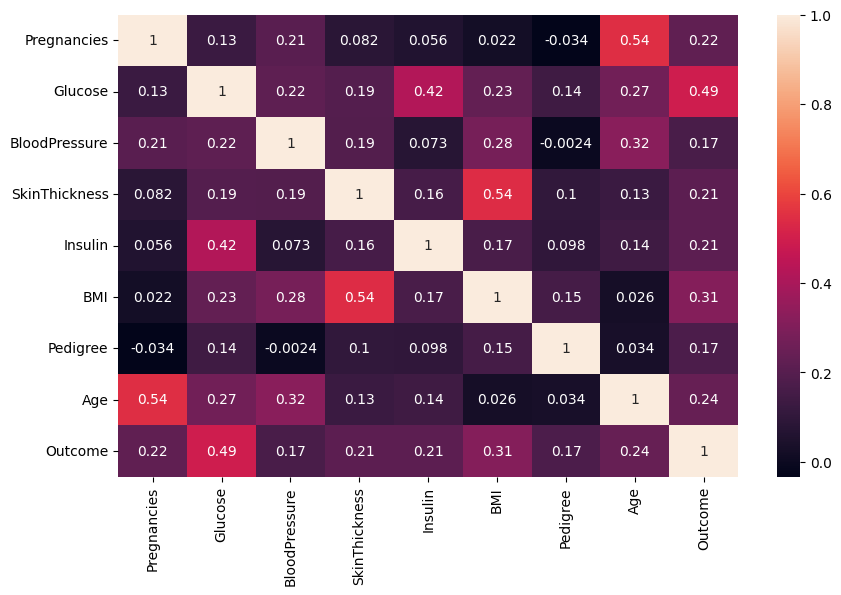

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [13]:
scaler = StandardScaler()
scaler.fit(df.drop('Outcome',axis=1))


StandardScaler()

In [14]:
scaled_features = scaler.transform(df.drop('Outcome',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age
0,0.639947,0.865041,-0.031990,0.670643,0.002728,0.167240,0.468492,1.425995
1,-0.844885,-1.206228,-0.528319,-0.012301,0.002728,-0.851551,-0.365061,-0.190672
2,1.233880,2.015746,-0.693761,-0.012301,0.002728,-1.331838,0.604397,-0.105584
3,-0.844885,-1.074719,-0.528319,-0.695245,-0.726976,-0.633239,-0.920763,-1.041549
4,-1.141852,0.503391,-2.679076,0.670643,0.143961,1.549885,5.484909,-0.020496


In [15]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['Outcome'],
                                                    test_size=0.30, random_state=101)

In [22]:
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier
#initialize and train knn classifier
neighbor = KNeighborsClassifier(n_neighbors=5)
neighbor.fit(X_train,y_train)



KNeighborsClassifier()

In [18]:
predict = neighbor.predict(X_test)

In [23]:
print("confusion matrix")
print(confusion_matrix(y_test,predict))

confusion matrix
[[129  21]
 [ 30  51]]


In [24]:
print("classification report")
print(classification_report(y_test,predict))

classification report
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       150
           1       0.71      0.63      0.67        81

    accuracy                           0.78       231
   macro avg       0.76      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231



In [25]:
print("accuracy score")
print(accuracy_score(y_test,predict))

accuracy score
0.7792207792207793


In [26]:
#Choosing the optimum K value#
# Here we will check Error for k value in range of 1 to 40#
# the default value for k is 5#
acc_rate= []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    acc=np.mean(pred_i == y_test)
    acc_rate.append(acc)

Text(0, 0.5, 'Error_rate')

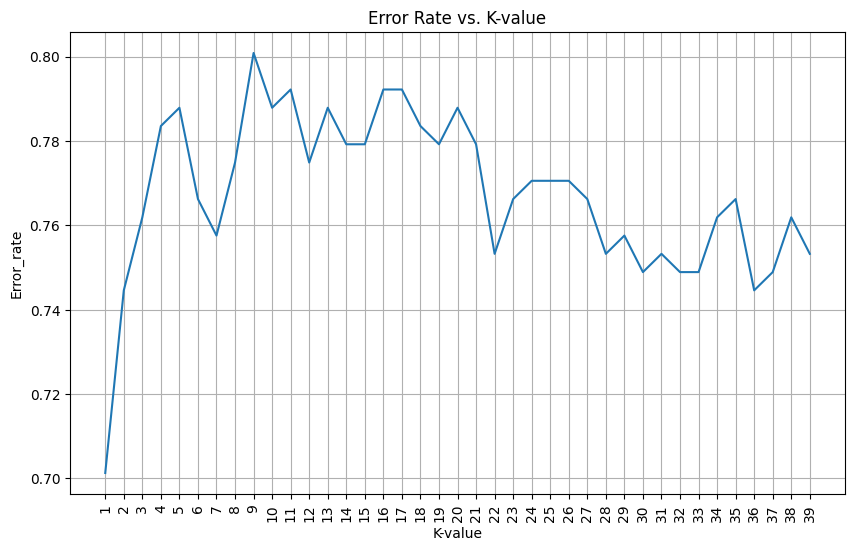

In [27]:
# Plot of Error(accuracy) vs K-value
plt.figure(figsize=(10,6))
plt.plot(range(1,40), acc_rate)
plt.title("Error Rate vs. K-value")
plt.xticks(list(range(1,40)),rotation=90)
plt.grid()
plt.xlabel('K-value')
plt.ylabel('Error_rate')

In [ ]:
# as you can see the k value with 9 has highest accuracy rate#

In [28]:
# let us compare with other values
#WITH K=8(FOR COMPARISON) 1
knn = KNeighborsClassifier(n_neighbors= 8)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print('WITH K=8')

print('\n')
print(confusion_matrix(y_test,pred) )
print(classification_report(y_test, pred) )
print(accuracy_score(y_test,pred))

WITH K=8


[[135  15]
 [ 37  44]]
              precision    recall  f1-score   support

           0       0.78      0.90      0.84       150
           1       0.75      0.54      0.63        81

    accuracy                           0.77       231
   macro avg       0.77      0.72      0.73       231
weighted avg       0.77      0.77      0.76       231

0.7748917748917749


In [29]:

#WITH K=9(FOR COMPARISON) 1
knn = KNeighborsClassifier(n_neighbors= 9)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print('WITH K=8')

print('\n')
print(confusion_matrix(y_test,pred) )
print(classification_report(y_test, pred) )
print(accuracy_score(y_test,pred))

WITH K=8


[[129  21]
 [ 25  56]]
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       150
           1       0.73      0.69      0.71        81

    accuracy                           0.80       231
   macro avg       0.78      0.78      0.78       231
weighted avg       0.80      0.80      0.80       231

0.8008658008658008


In [ ]:
# k optimal value is 9